## Project 4:  Solving N-Queens Problem using Genetic Algorithms

#### CSC 180  Intelligent Systems

#### Dr. Haiquan Chen, California State University, Sacramento


In [17]:
# Trevor Ahlberg, Sac State ID: 302002051, CSC 180 Intelligent Systems, Project 4, 11-18-21














## Part I: Position-index-based board representation

In [51]:
import random
import math
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


In [19]:
def create_individual():
    return random.sample(range(64), 8)

In [20]:
print(create_individual())

[34, 63, 47, 0, 49, 12, 36, 40]


In [21]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [22]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [23]:
pop = toolbox.population(n=5)

print(pop[0])

[60, 50, 35, 34, 24, 54, 31, 30]


In [24]:
show_grid(pop[0])

-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
X|-|-|-|-|-|X|X|
----------------
-|-|X|X|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|X|-|
----------------
-|-|-|-|X|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which returns the fitness of any given board.  

- Noticed that in this case, mutation may generate invalid board, e.g., the board with dupliciate positions.  Think about   [5, 32, 8, 8, 41, 3, 55, 49]

- How to exclude those invalid boards from each generation? One way is to add some penalty to the fitness value of invalid boards.  In that case, any invalid board will have a very high fitness value (remember that our goal is to find the board with least fitness value).    To do that, let's write a function ***checkDuplicate()*** to calculate the number of queen pairs in the same position for any given board.   ***Give each duplicate a high penalty (i.e., multiply by 20, 50) and add the penalty to the fitness value.*** 

-  evaFitness() returns the total number of duplicate position pair (with penalty) plus the total number of distinct pairs of queens that attack each other.  

In [25]:

#fitness function
def evaFitness(individual):
    
    conflict = 0
    

    
    for i in range(8):
        for n in range(i, 8):
            
            if i == n:
                continue
                    
                    
            col1 = individual[i]%8
            col2 = individual[n]%8
            
            row1 = individual[i]//8
            row2 = individual[n]//8
            
            #check for same column
            if col1 == col2:
                conflict += 1
                
            #check for same row
            elif row1 == row2:
                conflict += 1
                
            #check diagonal 1
            elif row1+col1 == row2+col2:
                conflict += 1
            
            #check diagonal 2
            elif row1-col1 == row2-col2:
                conflict += 1
            
    return (checkDuplicate(individual) + conflict,)
    

    
    


    
# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):
    dup = 0
    
    unique, duplicates = np.unique(individual, return_counts = True)

    for i in duplicates:
        if i > 1:
            dup += i
    
    dup *= 50
    
    
    return dup
    
    

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [26]:

toolbox.register("evaluate", evaFitness)






In [27]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [28]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [29]:
stats.register("avg", np.mean)
stats.register("min", np.min)

### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [30]:
pop = toolbox.population(n=10000)

hof = tools.HallOfFame(maxsize=1)

pop, log= algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)











gen	nevals	avg   	min
0  	10000 	10.067	3  
1  	6006  	19.1252	2  
2  	6007  	19.4785	2  
3  	5964  	18.2975	2  
4  	6037  	17.8623	2  
5  	6016  	17.6442	2  
6  	6048  	17.8747	2  
7  	5909  	16.8158	2  
8  	5950  	16.9792	2  
9  	6006  	16.9739	2  
10 	5917  	16.3919	1  
11 	5981  	16.474 	1  
12 	6086  	16.4174	1  
13 	5899  	15.8542	2  
14 	6067  	16.547 	2  
15 	5993  	16.3839	0  
16 	5989  	15.3725	0  
17 	6049  	14.7984	0  
18 	5963  	15.3031	0  
19 	5978  	14.4845	0  
20 	5981  	15.4101	0  
21 	6102  	14.8301	0  
22 	6073  	14.8473	0  
23 	6048  	14.5322	0  
24 	6010  	14.0244	0  
25 	5936  	13.9956	0  
26 	5974  	13.0817	0  
27 	6030  	12.7866	0  
28 	5985  	12.1194	0  
29 	5986  	11.2385	0  
30 	6004  	10.5501	0  
31 	5990  	10.0039	0  
32 	5802  	9.2286 	0  
33 	5976  	8.5216 	0  
34 	5952  	7.7011 	0  
35 	5957  	5.4309 	0  
36 	6046  	3.3106 	0  
37 	5919  	2.171  	0  
38 	5937  	2.2814 	0  
39 	5986  	2.4369 	0  
40 	5950  	2.2404 	0  
41 	6039  	2.0836 	0  
42 	6115  	2.

### 5 pts:  Plot the "avg" and "min" for each generation

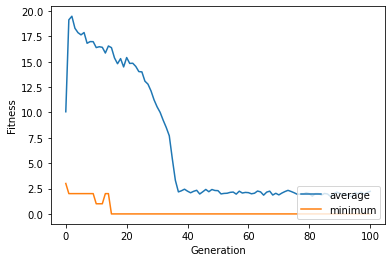

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline  

gen, avg, min_ = log.select("gen", "avg", "min")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()


### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [32]:

print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)

show_grid(hof[0])



Best individual is:  [60, 26, 6, 9, 43, 21, 55, 32]

with fitness:  (0.0,)
-|-|-|-|-|-|X|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|X|-|-|-|
----------------


## Part II: Row-index-based board representation

In [33]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [34]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [35]:
toolbox.individual()

[6, 0, 4, 6, 5, 3, 4, 5]

In [36]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [37]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [38]:
pop = toolbox.population(n=5)

print(pop[0])

[5, 6, 1, 0, 6, 6, 6, 0]


In [39]:
show_grid(pop[0])

-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|X|-|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|X|-|
----------------
X|-|-|-|-|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  

- The following are some test cases you may use to verify the correctness of the evaFitness() function:

 * evaFitness([0, 2, 6, 7, 7, 4, 1, 6]) should return (4,)

 * evaFitness([7, 5, 2, 4, 3, 1, 3, 5]) should return (6,)

 * evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) should return (5,)

 * evaFitness([7, 3, 1, 4, 5, 1, 3, 5]) should return (6,)



In [40]:
#fitness function
def evaFitness(individual):
    
    conflict = 0
    
    for i in range(8):
        for n in range(i, 8):
            
            #skip if identical
            if i == n:
                continue
            
            #Check column
            if individual[i] == individual[n]:
                conflict += 1
                
            #Check diagonal 1
            if individual[i] == (individual[n]-(n-i)):
                conflict += 1
                
            #Check diagonal 2
            if individual[i] == (individual[n]+(n-i)):
                conflict += 1
            
    
    return (conflict,)



    
 
    

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [41]:
evaFitness([0, 2, 6, 7, 7, 4, 1, 6])

(4,)

In [42]:
evaFitness([7, 5, 2, 4, 3, 1, 3, 5])

(6,)

In [43]:
evaFitness([3, 1, 6, 0, 5, 7, 2, 1])

(5,)

In [44]:
evaFitness([7, 3, 1, 4, 5, 1, 3, 5])

(6,)

In [45]:

toolbox.register("evaluate", evaFitness)



In [46]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)



In [47]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)


stats.register("avg", np.mean)
stats.register("min", np.min)



### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [48]:

pop = toolbox.population(n=10000)

hof = tools.HallOfFame(maxsize=1)

pop, log= algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)



gen	nevals	avg   	min
0  	10000 	7.9068	1  
1  	6027  	6.3808	1  
2  	6142  	5.5891	1  
3  	5988  	5.0404	0  
4  	5963  	4.6767	0  
5  	5893  	4.3726	0  
6  	5973  	4.1424	0  
7  	6089  	3.9831	0  
8  	5946  	3.8036	0  
9  	5837  	3.5934	0  
10 	6028  	3.473 	0  
11 	6100  	3.393 	0  
12 	6095  	3.2924	0  
13 	5975  	3.1566	0  
14 	6045  	3.0854	0  
15 	5945  	2.9286	0  
16 	6057  	2.7982	0  
17 	5926  	2.7161	0  
18 	5980  	2.6158	0  
19 	6013  	2.5369	0  
20 	6006  	2.4392	0  
21 	5999  	2.302 	0  
22 	6130  	2.1836	0  
23 	5968  	2.0042	0  
24 	6060  	1.8728	0  
25 	6102  	1.7791	0  
26 	5998  	1.5665	0  
27 	6079  	1.3751	0  
28 	5887  	1.119 	0  
29 	5814  	0.8467	0  
30 	5972  	0.6336	0  
31 	5940  	0.4989	0  
32 	5965  	0.4023	0  
33 	6073  	0.3719	0  
34 	5945  	0.3283	0  
35 	5981  	0.3203	0  
36 	6046  	0.3176	0  
37 	5937  	0.2892	0  
38 	6020  	0.2969	0  
39 	5983  	0.2925	0  
40 	5910  	0.2731	0  
41 	5904  	0.2901	0  
42 	6100  	0.2882	0  
43 	5959  	0.2845	0  
44 	6023  

### 5 pts:  Plot the "avg" and "min" for each generation

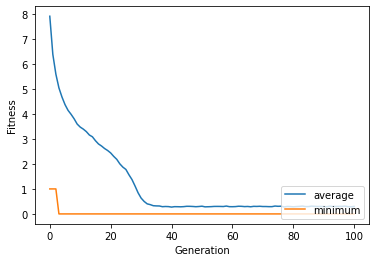

In [49]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

gen, avg, min_ = log.select("gen", "avg", "min")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()




### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [50]:

print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)

show_grid(hof[0])






Best individual is:  [3, 1, 7, 5, 0, 2, 4, 6]

with fitness:  (0.0,)
-|-|-|X|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|-|X|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------


### Reflection:  Which board representaion is better in terms of ease of coding and final solution quality?   Try different parameter values for mutation and crossover and vary the number of generations and the population size.  Write your findings in the report.        